Los datos bankData.csv corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable “y” ubicada en la última columna de la tabla) en función de un conjunto de 18 atributos descritos en el archivo Atributos.pdf. Cargue el conjunto de datos (bankData.csv) en este notebook y responda las preguntas.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Librerías principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
data = pd.read_csv('bankData.csv') #Carga de la base de datos

In [3]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.describe(include='all')

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
# Función para crear variables dummies para variables categoricas 

def preprocess_data(df):
    # temporal copy
    tmp_df = df
    # identify categorical variables to be recoded
    get_categoricals = df.dtypes[np.where(df.dtypes.values == 'object',
    True, False)]
    # for each name
    for i in get_categoricals.index:
        # create a set of dummies
        tmp_dummies = pd.get_dummies(tmp_df[i], drop_first=True,prefix=i)
        # drop the original column
        tmp_df = tmp_df.drop(columns = i)
        # concatenate and update tmp dataframe
        tmp_df = pd.concat([tmp_df, tmp_dummies], axis=1)
    # return
    return tmp_df

In [6]:
# Aplicando la función a la data

data = preprocess_data(data)
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,0,1,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,0,0,1,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,1,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,1,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,1,0,0,0,1,0,0


In [7]:
# Variable objetivo

data["y_yes"].value_counts()

0    3668
1     451
Name: y_yes, dtype: int64

Para las siguientes preguntas, considere las siguientes particiones de los datos

In [8]:
#primera partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:18],data['y_yes'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

In [9]:
# Escalamiento de los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_train2 = scaler.fit_transform(X_train2)
X_val = scaler.transform(X_val)

## Pregunta 1
Usando `X_train2` (para entrenamiento) y `X_val` (para evaluación), explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste. Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

### Respuesta:

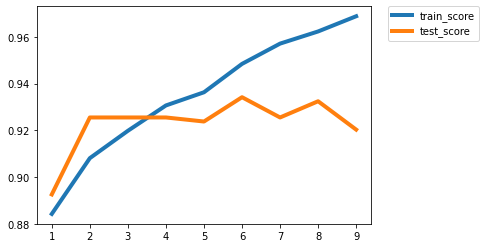

In [10]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


train_x2_score, x_val_score = [],[]
for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_x2_score.append(tree.score(X_train2, y_train2))
    x_val_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_x2_score, label="train_score", linewidth=4)
plt.plot(range(1,10), x_val_score, label="test_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

**Comentario:** Se puede apreciar que una profundidad adecuada para un árbol de decisión tal que no haya sobreajuste es max_depth = 6

In [11]:
# Aplicación del modelo utilizando max_depth = 6

arbol =  DecisionTreeClassifier(random_state=0, max_depth=6).fit(X_train, y_train)
yhat = arbol.predict(X_test)

In [28]:
# Cálculo de la matriz de confusión 

C = confusion_matrix(y_test, yhat)
clasif_correctas_clase_0 = (C[0][0]/C[0].sum()*100).round(3)
clasif_correctas_clase_1 = (C[1][1]/C[1].sum()*100).round(3)

In [30]:
print("El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de", clasif_correctas_clase_0, 
      "% y para la clase 1 (va a tomar un depósito a plazo) es de", clasif_correctas_clase_1, "%")

El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de 95.512 % y para la clase 1 (va a tomar un depósito a plazo) es de 32.787 %


In [31]:
# Reporte de métricas

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1114
           1       0.44      0.33      0.38       122

    accuracy                           0.89      1236
   macro avg       0.69      0.64      0.66      1236
weighted avg       0.88      0.89      0.89      1236



**Comentario:** Se puede apreciar que al modelo le cuesta clasificar la clase 1 (los clientes que va a tomar un depósito a plazo) dado que las métricas de precision, recall y f1-score son muy bajas

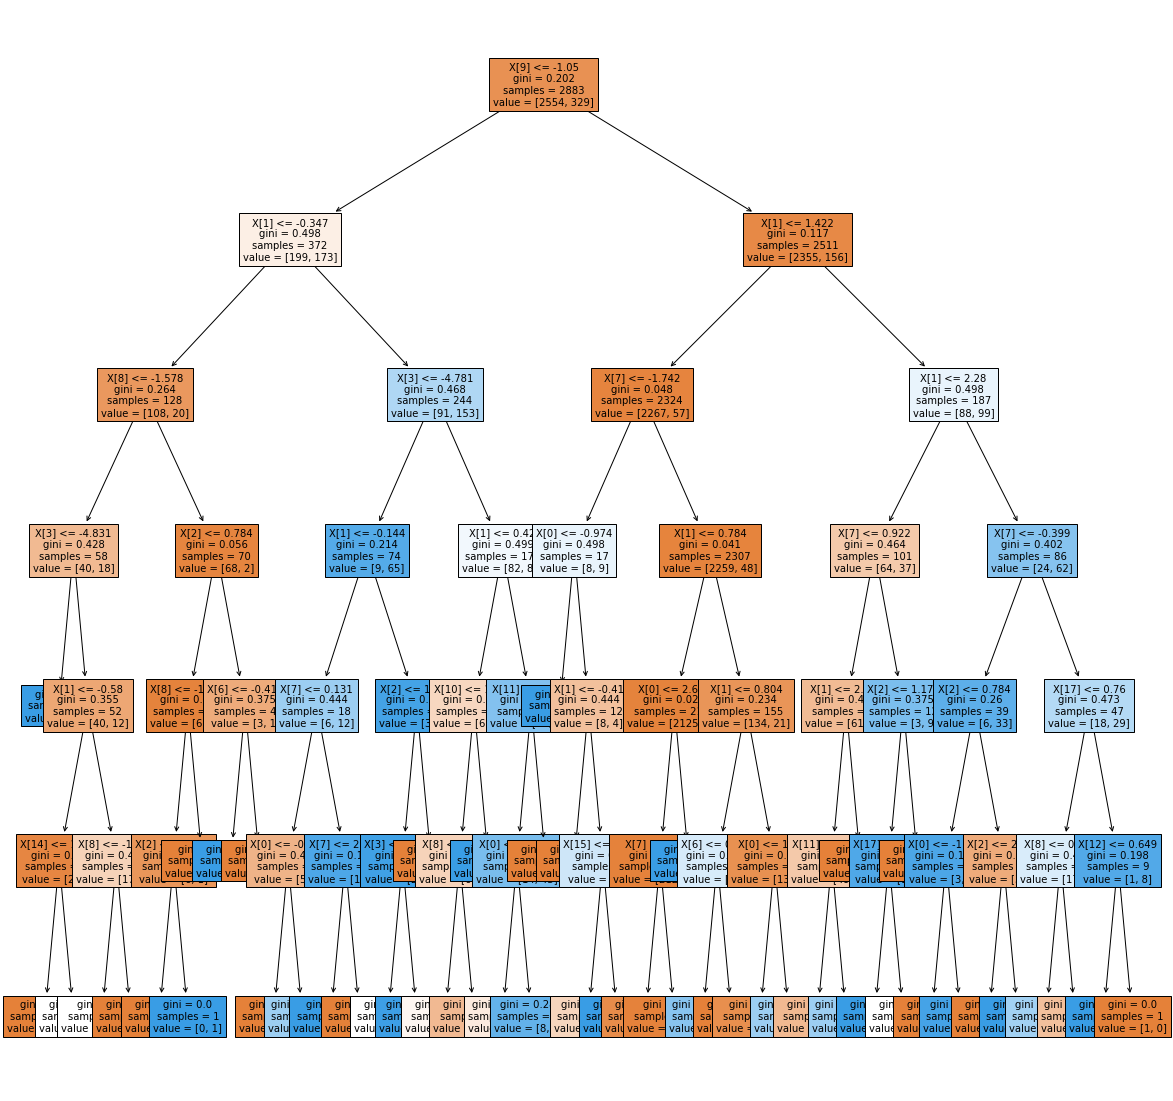

In [32]:
# Gráfico árbol de decisión

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (20,20))
plot_tree(arbol, fontsize=10, filled=True)
plt.show()

## Pregunta 2
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta

In [33]:
# Feature importances sum up to 1
print("Feature importances:\n{}".format(arbol.feature_importances_))

Feature importances:
[0.04039072 0.44951238 0.03124234 0.05705275 0.         0.
 0.00851887 0.05849665 0.03023029 0.29028908 0.00397375 0.01327221
 0.00490546 0.         0.00252938 0.00283816 0.         0.00674797]


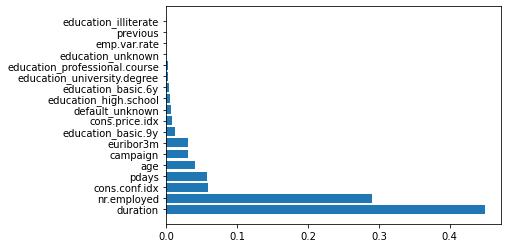

In [34]:
def plot_feature_importance(fit_model, feat_names, n=10):
    """
    Plot relative importance of a feature subset given a fitted model.
    """
    tmp_importance = fit_model.feature_importances_

    sort_importance = np.argsort(tmp_importance)[::-1][:n]
    names = [feat_names[i] for i in sort_importance]

    plt.barh(range(len(names)), tmp_importance[sort_importance])
    plt.yticks(range(len(names)),  names, rotation=0)
    
plot_feature_importance(arbol, data.columns, 40)

**Comentarios:** Se puede apreciar que los atributos más importantes son duration, nr.employed, cons.conf.idx, pdays, age campaign y euribor3m. Por otro lado las varibles menos importantes son las variables asociadas a las categorías de education ("basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"), previous,  cons.price.idx, emp.var.rate y default_unknown que es la variable asociada a la categoría unknow de la variable default.

## Pregunta 3
Considere un clasificador Random Forest. Usando `X_train2` y `X_val` utilice una estrategia de búsqueda de hiperparámetros, para determinar el valor de `n_estimators` (cantidad de árboles) y `max_features` (la cantidad de características a considerar al buscar la mejor división o split) con tal que el model no sobreajuste. Luego, entrene un random forest (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?

### Respuesta

In [35]:
# Grilla para encontrar la mejor combinanción de hiper parámetros

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  

random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt', 'log2']}

rf_random = GridSearchCV(RandomForestClassifier(random_state = 0), random_grid, cv = 3, verbose=0, 
                         n_jobs = -1).fit(X_train2, y_train2)

In [36]:
print("Los mejores parámetros son", rf_random.best_params_)

Los mejores parámetros son {'max_features': 'auto', 'n_estimators': 200}


In [37]:
# Implementación del modelos con la mejor combinación de hiper parámetros

rf_model = RandomForestClassifier(random_state = 0, n_estimators = 200, max_features="auto").fit(X_train, y_train)
yhat = rf_model.predict(X_test)

In [38]:
# Cálculo de la matriz de confusión 

C = confusion_matrix(y_test, yhat)
clasif_correctas_clase_0 = (C[0][0]/C[0].sum()*100).round(3)
clasif_correctas_clase_1 = (C[1][1]/C[1].sum()*100).round(3)

In [39]:
print("El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de", clasif_correctas_clase_0, 
      "% y para la clase 1 (va a tomar un depósito a plazo) es de", clasif_correctas_clase_1, "%")

El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de 95.153 % y para la clase 1 (va a tomar un depósito a plazo) es de 39.344 %


In [40]:
# Reporte de métricas 

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1114
           1       0.47      0.39      0.43       122

    accuracy                           0.90      1236
   macro avg       0.70      0.67      0.69      1236
weighted avg       0.89      0.90      0.89      1236



**Comentarios:** El porcentaje de predicciones correctas para la clase 0 se mantiene igual, pero aumenta en 7% el porcentaje de las predicciones correctas para la clase 1 en compración al modelo anterior.

## Pregunta 4
Siga la misma idea de la pregunta 3, pero ahora considere un SVM para clasificación, i.e., `SVC(kernel='rbf', C=A, gamma=B)`. En este caso la búsqueda de los hiperparámetros corresponde a encontrar valores apropiados para A y B. Luego, entrene un SVC (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?  

### Respuesta

In [44]:
# Grilla para encontrar los mejores hiper parámtros

from sklearn.svm import SVC

params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
get_params = GridSearchCV(SVC(kernel='rbf', random_state=0), params, cv=10, return_train_score=True)
get_params.fit(X_train2, y_train2)
print("La mejor combinación de hiper parámetros es:", get_params.best_params_)
print("El desempeño en la muestra de entrenamiento es:", (get_params.best_score_).round(3))

La mejor combinación de hiper parámetros es: {'C': 10, 'gamma': 0.01}
El desempeño en la muestra de entrenamiento es: 0.915


In [45]:
# Implementación del modelo con la mejor combinación de hiper parámetros

svc_model = SVC(kernel='rbf', random_state=0, C=10, gamma=0.01).fit(X_train, y_train)
yhat = svc_model.predict(X_test)

In [46]:
# Cálculo de la matriz de confusión 

C = confusion_matrix(y_test, yhat)
clasif_correctas_clase_0 = (C[0][0]/C[0].sum()*100).round(3)
clasif_correctas_clase_1 = (C[1][1]/C[1].sum()*100).round(3)

In [47]:
print("El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de", clasif_correctas_clase_0, 
      "% y para la clase 1 (va a tomar un depósito a plazo) es de", clasif_correctas_clase_1, "%")

El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de 96.679 % y para la clase 1 (va a tomar un depósito a plazo) es de 32.787 %


In [48]:
# Reporte de métricas

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1114
           1       0.52      0.33      0.40       122

    accuracy                           0.90      1236
   macro avg       0.72      0.65      0.67      1236
weighted avg       0.89      0.90      0.89      1236



**Comentarios:**  El porcentaje de predicciones correctas para la clase 0 es mayor en 1%, pero el porcentaje de las predicciones correctas para la clase 1 en compración al modelo de la pregunta 1 es casi igual.

## Pregunta 5 
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`.

### Respuesta

In [51]:
# Implementación modelo Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
nbg_model = GaussianNB().fit(X_train, y_train)
yhat = nbg_model.predict(X_test)

In [55]:
# Cálculo de la matriz de confusión 

C = confusion_matrix(y_test, yhat)
clasif_correctas_clase_0 = (C[0][0]/C[0].sum()*100).round(3)
clasif_correctas_clase_1 = (C[1][1]/C[1].sum()*100).round(3)

In [56]:
print("El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de", clasif_correctas_clase_0, 
      "% y para la clase 1 (va a tomar un depósito a plazo) es de", clasif_correctas_clase_1, "%")

El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de 25.314 % y para la clase 1 (va a tomar un depósito a plazo) es de 98.361 %


## Pregunta 6
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train`, pero sólo utilizando los atributos que aparecen en el árbol obtenido en la pregunta 1. Entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. ¿Mejora el desempeño al comparar con lo obtenido en la pregunta 5?

### Respuesta

In [57]:
# Consideramos solo las variables que aparecen en el árbol obtenido en la pregunta 1

data_att_tree = data.loc[:,["education_illiterate", "previous", "emp.var.rate", "education_unknown", 
                            "education_professional.course", "education_university.degree", "education_basic.6y",
                            "education_high.school", "default_unknown", "cons.price.idx", "education_basic.9y",
                            "euribor3m", "campaign", "age", "pdays", "cons.conf.idx", "nr.employed", "duration", "y_yes"]]

In [58]:
# Partición de la muestra

X_train, X_test, y_train, y_test = train_test_split(data_att_tree.drop("y_yes", axis = 1), data_att_tree['y_yes'], 
                                                    test_size=0.3, random_state=0)

In [59]:
# Implementación del modelo

nbg_model_2 = GaussianNB().fit(X_train, y_train)
yhat_2 = nbg_model.predict(X_test)

In [64]:
# Cálculo de la matriz de confusión 

C = confusion_matrix(y_test, yhat_2)
clasif_correctas_clase_0 = (C[0][0]/C[0].sum()*100).round(3)
clasif_correctas_clase_1 = (C[1][1]/C[1].sum()*100).round(3)

In [65]:
print("El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de", clasif_correctas_clase_0, 
      "% y para la clase 1 (va a tomar un depósito a plazo) es de", clasif_correctas_clase_1, "%")

El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es de un para la clase 0 (no va a tomar un depósito a plazo) es de 100.0 % y para la clase 1 (va a tomar un depósito a plazo) es de 0.0 %


**Comentarios:** El modelo considerando solo las variables que aparecen en el árbol obtenido en la pregunta 1 mejora el porcentaje de clasificaciones correctas para la clase 0 pero las empeora para la clase 1

## Suerte!